Dynamical Structure Factor
(Still someting wrong)

In [76]:
from ase.io import read

atoms=read('optimized.vasp',format='vasp')

In [77]:
import numpy as np
natom=len(atoms.positions)
nmodes=natom*3
dyn_file='Dyn.form'
lammps_dyn=np.loadtxt(dyn_file).reshape((nmodes,nmodes))

In [78]:
eigenvalue, eigenvector=np.linalg.eigh(lammps_dyn)

In [79]:
def broadening(omega1, omega2, sigma):
    delta=1.0/np.pi*sigma/((omega1-omega2)**2+sigma*sigma)
    return delta

In [80]:
a_super=atoms.cell[0,0]
a0=a_super/4
a0

5.47232925

In [107]:
kmin=2.0*np.pi/21.8893169999999984
kmin

0.28704346084346016

In [109]:
omega_min=5.0
omega_max=100.0
nom=100
nwn=10
om=np.linspace(omega_min,omega_max,nom)
wn=np.linspace(kmin,kmin*10,nwn)

dsf_L=np.zeros([nwn,nom])
EL=np.zeros([nwn,nmodes])

In [110]:
wn

array([0.28704346, 0.57408692, 0.86113038, 1.14817384, 1.4352173 ,
       1.72226077, 2.00930423, 2.29634769, 2.58339115, 2.87043461])

In [111]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=-np.sqrt(-eigenvalue[i])*pc.scale_cm
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_cm
        omega.append(val)

In [119]:
omega[100]

117.73720279192405

In [129]:
k=np.array([[1,0,0]])
np.repeat(k,3,axis=0)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [167]:
#test for single mode eigenvector
ind=10
partial=eigenvector[:,ind]
print(partial)
EL=np.zeros([nwn,nmodes])

for ik in range(nwn):
    #100 direction
    k=np.array([[0,wn[ik],0]])
    n_1=np.array([[1.0,0.0,0.0]])
    disp=np.reshape(partial,(natom,3))
    polarlization=np.dot(n_1,disp.T)
    phase=np.exp(1.0j*np.dot(k,atoms.positions.T))
    value=np.dot(polarlization,phase.T)
    
    EL[ik,ind]=EL[ik,ind]+np.abs(value)**2/3

[-2.65424349e-02 -2.56939634e-02  2.42578521e-02 ... -4.72602373e-05
  1.15795411e-05  8.23562723e-06]


In [168]:
EL[:,ind]

array([0.18216322, 0.10147414, 0.38539644, 0.10183702, 0.01300683,
       0.0027919 , 0.09536299, 0.17804513, 0.3526594 , 0.10023854])

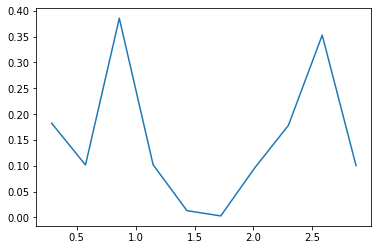

In [169]:
import matplotlib.pyplot as plt 
plt.plot(wn,EL[:,ind])

In [88]:
omega[ind]

53.822171078339295

In [89]:
b=[]
sigma=0.01
for iw in range(nom):
    b.append(broadening(om[iw],omega[ind],sigma))

In [90]:
b

[1.3354140239251236e-06,
 1.389498193276332e-06,
 1.4469357591362824e-06,
 1.5080097904497662e-06,
 1.5730338671178176e-06,
 1.6423561131785468e-06,
 1.7163638659674142e-06,
 1.7954890985051824e-06,
 1.880214737251914e-06,
 1.9710820482679887e-06,
 2.0686993033751982e-06,
 2.173751986248244e-06,
 2.287014859292349e-06,
 2.40936628937847e-06,
 2.5418053289365175e-06,
 2.685472175140049e-06,
 2.8416727928434786e-06,
 3.0119086986382884e-06,
 3.1979131804364454e-06,
 3.4016955922518026e-06,
 3.6255958492496703e-06,
 3.872351898609706e-06,
 4.145183821218671e-06,
 4.447899419581625e-06,
 4.785027802273553e-06,
 5.161989781524034e-06,
 5.585317151631347e-06,
 6.062937555748229e-06,
 6.604548358712583e-06,
 7.222112787408606e-06,
 7.930526265963821e-06,
 8.748523092427636e-06,
 9.699927887145833e-06,
 1.0815410207916945e-05,
 1.2134987554502129e-05,
 1.3711665107908105e-05,
 1.5616842884437937e-05,
 1.794854377895278e-05,
 2.0844278857886142e-05,
 2.45017962849187e-05,
 2.9213760145371025e-0

In [91]:
dsf_L=np.zeros([nwn,nom])
sigma=0.5
for iw in range(nom):
    for ik in range(nwn):
        dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

In [92]:
dsf_L[0,:]

array([1.15649343e-17, 1.20332622e-17, 1.25306236e-17, 1.30594689e-17,
       1.36225123e-17, 1.42227673e-17, 1.48635864e-17, 1.55487086e-17,
       1.62823137e-17, 1.70690861e-17, 1.79142903e-17, 1.88238585e-17,
       1.98044955e-17, 2.08638021e-17, 2.20104234e-17, 2.32542250e-17,
       2.46065064e-17, 2.60802583e-17, 2.76904756e-17, 2.94545401e-17,
       3.13926919e-17, 3.35286119e-17, 3.58901482e-17, 3.85102286e-17,
       4.14280140e-17, 4.46903691e-17, 4.83537557e-17, 5.24866907e-17,
       5.71729712e-17, 6.25159536e-17, 6.86442970e-17, 7.57197767e-17,
       8.39480615e-17, 9.35938171e-17, 1.05002236e-16, 1.18630321e-16,
       1.35093317e-16, 1.55235286e-16, 1.80239312e-16, 2.11804941e-16,
       2.52444144e-16, 3.05995623e-16, 3.78562745e-16, 4.80325713e-16,
       6.29297974e-16, 8.59826592e-16, 1.24412272e-15, 1.95566738e-15,
       3.50028880e-15, 7.88344018e-15, 2.87300299e-14, 1.04530955e-13,
       1.95589649e-14, 6.27000511e-15, 2.98817248e-15, 1.73425326e-15,
      

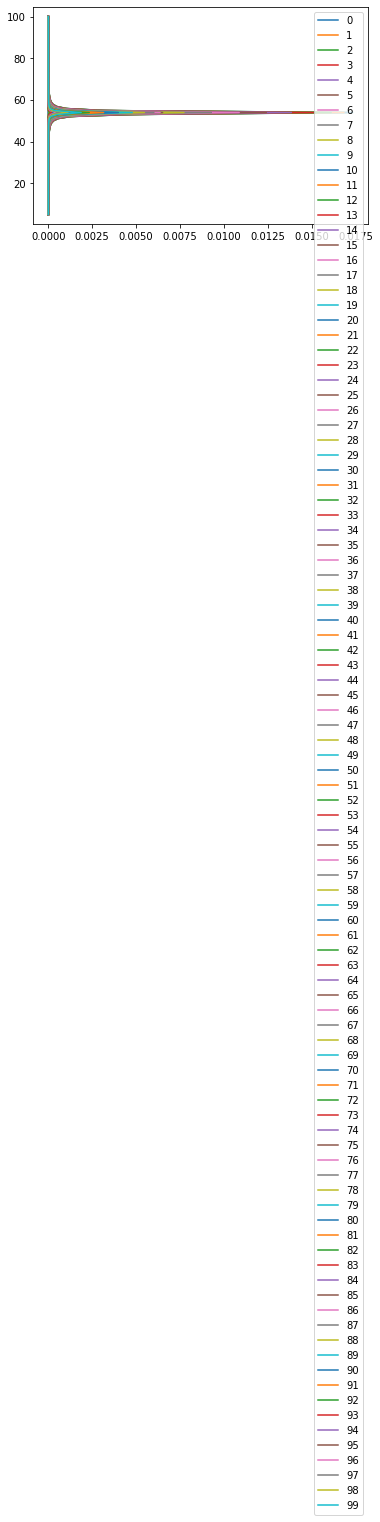

In [93]:
import matplotlib.pyplot as plt 
for ik in range(nwn):
    plt.plot(dsf_L[ik,:],om,label=str(ik))
plt.legend()

In [94]:
#[100] direction
dsf_L=np.zeros([nwn,nom])
EL=np.zeros([nwn,nmodes])

for ind, vec in enumerate(eigenvector.T):
    for ik in range(nwn):
        k=np.array([wn[ik],0,0])
        contrib=0.0
        for j in range(natom):
            nstart=3*j
            nend=3*(j+1)
            disp=vec[nstart:nend]
            pos=atoms.positions[j]
            phase=np.exp(1.0j*np.dot(k,pos))
            polarlization=np.dot(k,disp)
            factor=phase*polarlization
            contrib=contrib+factor

        EL[ik,ind]=EL[ik,ind]+np.abs(contrib)**2/3


In [95]:
EL[0,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [102]:
sigma=0.01
for iw in range(nom):
    for ik in range(nwn):
        for ind in range(nmodes):
            dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

In [106]:
np.linalg.norm(k)

1.1481738433738407